## Utilizing Convolutional Neural Networks to Predict Emotions Through Visual Cues in Facial Recognition

In [2]:
from sklearn.metrics import accuracy_score

In [3]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from data_load import convert_data

In [4]:

seed = 42
images, labels, classes, filepaths = convert_data()
Xtrain, Xval, Ytrain, Yval = train_test_split(images, labels, test_size=0.2, random_state=seed)

num_classes = len(Ytrain)


Current working directory: c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression
First few rows of the CSV:
  user.id                            image   emotion
0     628  facial-expressions_2868588k.jpg     anger
1     628  facial-expressions_2868585k.jpg  surprise
2     628  facial-expressions_2868584k.jpg   disgust
3     628  facial-expressions_2868582k.jpg      fear
4   dwdii           Aaron_Eckhart_0001.jpg   neutral

Sample filepaths in DataFrame:
  Image: facial-expressions_2868588k.jpg
  Filepath: c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression\images\facial-expressions_2868588k.jpg
  Image: facial-expressions_2868585k.jpg
  Filepath: c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression\images\facial-expressions_2868585k.jpg
  Image: facial-expressions_2868584k.jpg
  Filepath: c:\Users\brand\OneDrive\Desktop\CS178\final_project\cs178_facial_expression\images\facial-expressions_2868584k.jpg

Encoded emotion

Training data shape: (10212, 50, 50, 1)
Evaluation data shape: (2553, 50, 50, 1)


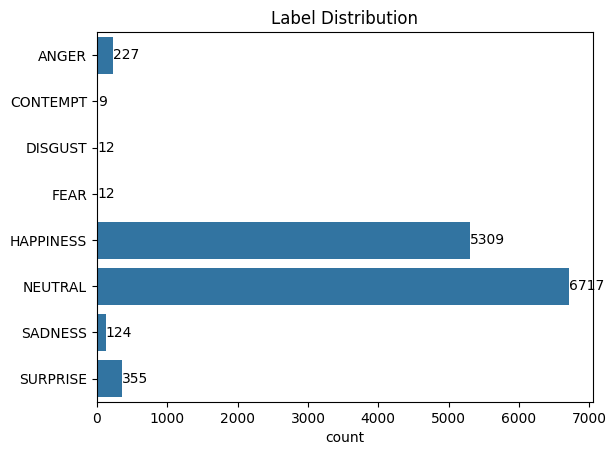

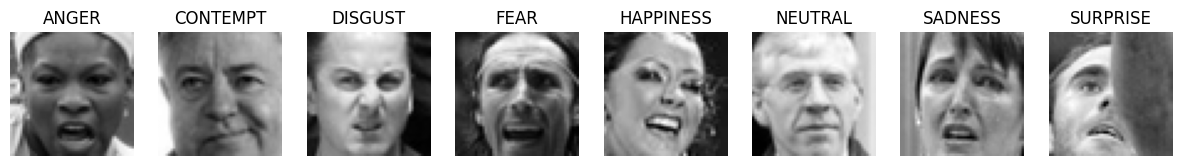

In [6]:
import seaborn as sns
#visualization
print(f"Training data shape: {Xtrain.shape}")
print(f"Evaluation data shape: {Xval.shape}")

ax = sns.countplot(y=labels)
plt.title('Label Distribution')
plt.yticks(ticks=range(len(classes)), labels=classes)

# Add counts to bars
for bar in ax.patches:
    count = int(bar.get_width())
    ax.text(
        bar.get_width() + 0.3,  # Adjust position for visibility
        bar.get_y() + bar.get_height() / 2, 
        f'{count}', 
        va='center'
    )

plt.show()

unique_labels = np.unique(labels)
plt.figure(figsize=(15, 10))

# Plot one image for each label
for i, label in enumerate(unique_labels):

    idx = np.where(labels == label)[0][0]
    plt.subplot(1, len(unique_labels), i + 1)
    
    plt.imshow(images[idx], cmap='gray')
    plt.axis('off')
    plt.title(classes[label])

plt.show()

In [10]:
from collections import defaultdict

X = images
y = labels
counts = defaultdict(int)
for i in y:
    counts[i] += 1
print('before oversampling:')
print(counts)

before oversampling:
defaultdict(<class 'int'>, {np.int32(5): 6717, np.int32(4): 5309, np.int32(7): 355, np.int32(6): 124, np.int32(0): 227, np.int32(1): 9, np.int32(2): 12, np.int32(3): 12})


In [15]:
# Map string labels to their corresponding integer values
label_map = {label: idx for idx, label in enumerate(classes)}

# Get indices for each label
contempt_i = np.where(y == label_map['CONTEMPT'])[0]
fear_i = np.where(y == label_map['FEAR'])[0]
disgust_i = np.where(y == label_map['DISGUST'])[0]
anger_i = np.where(y == label_map['ANGER'])[0]
sadness_i = np.where(y == label_map['SADNESS'])[0]
surprise_i = np.where(y == label_map['SURPRISE'])[0]
neutral_count = counts[np.int32(label_map['NEUTRAL'])]

# Calculate how many times to duplicate data
contempt_times = int(neutral_count / len(contempt_i)) - 1 if len(contempt_i) > 0 else 0
fear_times = int(neutral_count / len(fear_i)) - 1 if len(fear_i) > 0 else 0
disgust_times = int(neutral_count / len(disgust_i)) - 1 if len(disgust_i) > 0 else 0
anger_times = int(neutral_count / len(anger_i)) - 1 if len(anger_i) > 0 else 0
sadness_times = int(neutral_count / len(sadness_i)) - 1 if len(sadness_i) > 0 else 0
surprise_times = int(neutral_count / len(surprise_i)) - 1 if len(surprise_i) > 0 else 0

# Repeat data to balance the dataset
contempt_X = np.repeat(X[contempt_i], contempt_times, axis=0) if contempt_times > 0 else np.empty((0, X.shape[1]))
fear_X = np.repeat(X[fear_i], fear_times, axis=0) if fear_times > 0 else np.empty((0, X.shape[1]))
disgust_X = np.repeat(X[disgust_i], disgust_times, axis=0) if disgust_times > 0 else np.empty((0, X.shape[1]))
anger_X = np.repeat(X[anger_i], anger_times, axis=0) if anger_times > 0 else np.empty((0, X.shape[1]))
sadness_X = np.repeat(X[sadness_i], sadness_times, axis=0) if sadness_times > 0 else np.empty((0, X.shape[1]))
surprise_X = np.repeat(X[surprise_i], surprise_times, axis=0) if surprise_times > 0 else np.empty((0, X.shape[1]))

X_balanced = np.concatenate((X, contempt_X, fear_X, disgust_X, anger_X, sadness_X, surprise_X), axis=0)
y_balanced = np.concatenate((y,
                             np.repeat(label_map['CONTEMPT'], contempt_times * len(contempt_i)),
                             np.repeat(label_map['FEAR'], fear_times * len(fear_i)),
                             np.repeat(label_map['DISGUST'], disgust_times * len(disgust_i)),
                             np.repeat(label_map['ANGER'], anger_times * len(anger_i)),
                             np.repeat(label_map['SADNESS'], sadness_times * len(sadness_i)),
                             np.repeat(label_map['SURPRISE'], surprise_times * len(surprise_i))), axis=0)

# Count occurrences after balancing
counts_after = defaultdict(int)
for i in y_balanced:
    counts_after[i] += 1
print('\nafter:')
print(counts_after)

#update training and evalution data to balanced data
Xtrain, Xval, Ytrain, Yval = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=seed)


after:
defaultdict(<class 'int'>, {np.int64(5): 6717, np.int64(4): 5309, np.int64(7): 6390, np.int64(6): 6696, np.int64(0): 6583, np.int64(1): 6714, np.int64(2): 6708, np.int64(3): 6708})


In [ ]:
from tensorflow.keras import layers, models

# Create a hybrid CNN-RNN model
model = models.Sequential()

# CNN part
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Prepare for RNN - reshaping the CNN output
# After the last CNN layer, we need to reshape to sequence format
model.add(layers.Reshape((-1, 64)))  # Reshape to (feature_map_size, channels)

# RNN part
model.add(layers.LSTM(128, return_sequences=False))

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2, seed=seed))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN-RNN model
history = model.fit(Xtrain, Ytrain, epochs=3, validation_data=(Xval, Yval))


# Evaluate the model
result = model.evaluate(Xval, Yval)
result_dict = dict(zip(model.metrics_names, result))
print(f"Model Result\n-----\n{result_dict}")

Epoch 1/3
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 98s 74ms/step - accuracy: 0.2151 - loss: 2.3868 - val_accuracy: 0.6682 - val_loss: 0.8042
Epoch 2/3
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 94s 72ms/step - accuracy: 0.7401 - loss: 0.6429 - val_accuracy: 0.8625 - val_loss: 0.3385
Epoch 3/3
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 92s 71ms/step - accuracy: 0.8908 - loss: 0.2895 - val_accuracy: 0.9151 - val_loss: 0.2146
324/324 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9143 - loss: 0.2130
Model Result
-----
{'loss': 0.21461805701255798, 'compile_metrics': 0.9150989055633545}
